In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
# !pip install tensorflow-gpu==2.3.0
# !pip install sklearn

In [4]:
import tensorflow
import tensorflow as tf

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [7]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17425292336468470356,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9517711197795967823
 physical_device_desc: "device: XLA_CPU device"]

In [24]:
# actions = [
#     'punching',
#     'kicking',
#     'normal'
# ]

actions = ['1slap-L',
 '1slap-R',
 '2pushing-A',
 '2pushing-L',
 '2pushing-R',
 '3punching-L',
 '3puncning-R',
 '4kicking-L',
 '4kicking-R',
 '5tread-L',
 '5tread-R',
 '6footpushing-L',
 '6footpushing-R',
 'normal']

file_dir = 'C:/Users/BVer/are_you_ok/dataset/' #seq 파일을 dataset 폴더에 넣어주세요

npy_file = []
for name in os.listdir(file_dir):
    if not len(np.load(file_dir + name)) == 0:
        npy_file.append(np.load(file_dir + name))

data = np.concatenate(npy_file, axis=0)

data.shape

(1012, 30, 67)

In [25]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(1012, 30, 66)
(1012,)


In [17]:
for i in range(66):
    print(x_data[0][0][i])

394.0
562.0
0.8441540598869324
435.0
772.0
0.8765943050384521
310.0
772.0
0.7941014766693115
229.0
981.0
0.6327648758888245
228.0
980.0
0.8007018566131592
561.0
772.0
0.808250367641449
643.0
1022.0
0.8359115123748779
477.0
980.0
0.870720624923706
312.0
1272.0
0.5955219268798828
311.0
1565.0
0.8037852644920349
311.0
1857.0
0.7924233675003052
519.0
1272.0
0.6792072653770447
602.0
1564.0
0.7611410021781921
685.0
1815.0
0.8026642203330994
353.0
521.0
0.9489037990570068
435.0
521.0
0.921381950378418
311.0
562.0
0.7433963418006897
477.0
563.0
0.8375452756881714
101.04735565185547
78.9526596069336
68.8156509399414
113.6446533203125
71.84051513671875
122.35803985595703
76.17964172363281
13.624980926513672
0.20021018385887146
80.4633560180664
6.3310956954956055
2.430267572402954
1.0


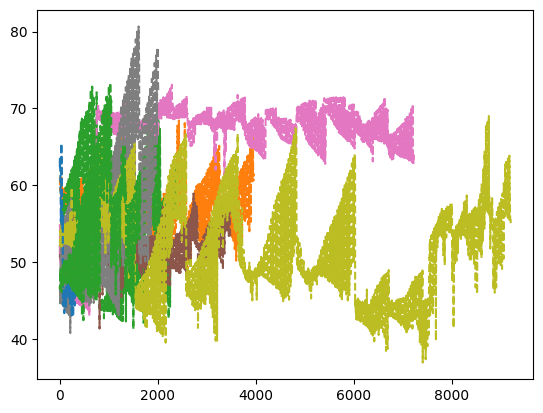

In [10]:
# punching = []
# kicking = []
# normal = []

slap_L = []
slap_R = []
pushing_A = []
pushing_L = []
pushing_R = []
punching_L = []
puncning_R = []
kicking_L = []
kicking_R = []
tread_L = []
tread_R = []
footpushing_L = []
footpushing_R = []
normal = []

count = 0
for count in range(len(x_data)):
    temp_count = 0
    temp = 0
    for j in range(30):
        for i in range(54, 66):
            t = data[count][j][i]
    #         print(t)
            if t != 0 and not np.isnan(t):
                temp += int(t)
                temp_count += 1
    #             print(temp)
        if not temp_count == 0:
            if data[count][j][66] == 0:
                slap_L.append(temp / temp_count)
            if data[count][j][66] == 1:
                slap_R.append(temp / temp_count)
            if data[count][j][66] == 2:
                pushing_A.append(temp / temp_count)
            if data[count][j][66] == 3:
                pushing_L.append(temp / temp_count)
            if data[count][j][66] == 4:
                pushing_R.append(temp / temp_count)
            if data[count][j][66] == 5:
                punching_L.append(temp / temp_count)
            if data[count][j][66] == 6:
                puncning_R.append(temp / temp_count)
            if data[count][j][66] == 7:
                kicking_L.append(temp / temp_count)
            if data[count][j][66] == 8:
                kicking_R.append(temp / temp_count)
            if data[count][j][66] == 9:
                tread_L.append(temp / temp_count)
            if data[count][j][66] == 10:
                tread_R.append(temp / temp_count)
            if data[count][j][66] == 11:
                footpushing_L.append(temp / temp_count)
            if data[count][j][66] == 12:
                footpushing_R.append(temp / temp_count)
            if data[count][j][66] == 13 and len(normal) < 40000:
                normal.append(temp / temp_count)
            
plt.plot(slap_L, '--', slap_R, '--', pushing_A, '--', pushing_L, '--', pushing_R, '--', punching_L, '--', puncning_R, '--', kicking_L, '--', kicking_R, '--', tread_L, '--', tread_R, '--', footpushing_L, '--', footpushing_R, '--', normal, 'r--')
plt.show()

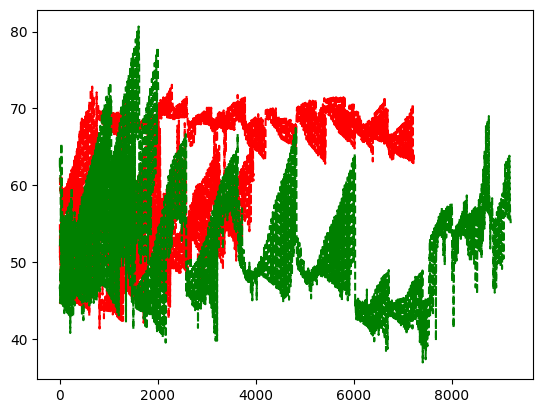

In [12]:
plt.plot(slap_L, 'r--', slap_R, 'r--', pushing_A, 'r--', pushing_L, 'r--', pushing_R, 'r--', punching_L, 'r--', puncning_R, 'r--', kicking_L, 'g--', kicking_R, 'g--', tread_L, 'g--', tread_R, 'g--', footpushing_L, 'g--', footpushing_R, 'g--', normal, 'b--')
plt.show()

In [19]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(1012, 14)

In [21]:
y_data[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
array([0., 1.],

In [14]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(910, 30, 66) (910, 14)
(102, 30, 66) (102, 14)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(Adam(1e-5), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                33536     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 14)                462       
Total params: 36,078
Trainable params: 36,078
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
24/29 [=======================>......] - ETA: 0s - loss: 3023.1467 - acc: 0.0482
Epoch 00001: val_acc improved from -inf to 0.06863, saving model to models\model.h5
29/29 [==============================] - 0s 14ms/step - loss: 3015.5784 - acc: 0.0505 - val_loss: 2761.2007 - val_acc: 0.0686
Epoch 2/200
23/29 [======================>.......] - ETA: 0s - loss: 3004.4277 - acc: 0.0489
Epoch 00002: val_acc improved from 0.06863 to 0.07843, saving model to models\model.h5
29/29 [==============================] - 0s 8ms/step - loss: 2993.4734 - acc: 0.0549 - val_loss: 3204.7319 - val_acc: 0.0784
Epoch 3/200
24/29 [=======================>......] - ETA: 0s - loss: 2900.6414 - acc: 0.0404
Epoch 00003: val_acc did not improve from 0.07843
29/29 [==============================] - 0s 7ms/step - loss: 2873.9565 - acc: 0.0418 - val_loss: 2935.5278 - val_acc: 0.0588
Epoch 4/200
23/29 [======================>.......] - ETA: 0s - loss: 2956.7051 - acc: 0.0571
Epoch 00004: val_acc improved f

In [32]:
#test version
t_x_data = data[:, :, 54:-1]
t_labels = data[:, 0, -1]

print(t_x_data.shape)
print(t_labels.shape)

from tensorflow.keras.utils import to_categorical

t_y_data = to_categorical(t_labels, num_classes=len(actions))
print(t_y_data.shape)

from sklearn.model_selection import train_test_split

t_x_data = t_x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

t_x_train, t_x_val, t_y_train, t_y_val = train_test_split(t_x_data, t_y_data, test_size=0.1, random_state=2021)

print(t_x_train.shape, t_y_train.shape)
print(t_x_val.shape, t_y_val.shape)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=t_x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(Adam(1e-5), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

(66715, 30, 12)
(66715,)
(66715, 14)
(60043, 30, 12) (60043, 14)
(6672, 30, 12) (6672, 14)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64)                19712     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 14)                462       
Total params: 22,254
Trainable params: 22,254
Non-trainable params: 0
_________________________________________________________________


In [33]:
#test version
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    t_x_train,
    t_y_train,
    validation_data=(t_x_val, t_y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/test_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
1875/1877 [============================>.] - ETA: 0s - loss: nan - acc: 0.0036
Epoch 00001: val_acc improved from -inf to 0.00270, saving model to models\test_model.h5
1877/1877 [==============================] - 24s 13ms/step - loss: nan - acc: 0.0036 - val_loss: nan - val_acc: 0.0027
Epoch 2/200
1875/1877 [============================>.] - ETA: 0s - loss: nan - acc: 0.0035
Epoch 00002: val_acc did not improve from 0.00270
1877/1877 [==============================] - 22s 12ms/step - loss: nan - acc: 0.0035 - val_loss: nan - val_acc: 0.0027
Epoch 3/200
1877/1877 [==============================] - ETA: 0s - loss: nan - acc: 0.0035
Epoch 00003: val_acc did not improve from 0.00270
1877/1877 [==============================] - 21s 11ms/step - loss: nan - acc: 0.0035 - val_loss: nan - val_acc: 0.0027
Epoch 4/200
1872/1877 [============================>.] - ETA: 0s - loss: nan - acc: 0.0035
Epoch 00004: val_acc did not improve from 0.00270
1877/1877 [=============================

KeyboardInterrupt: 

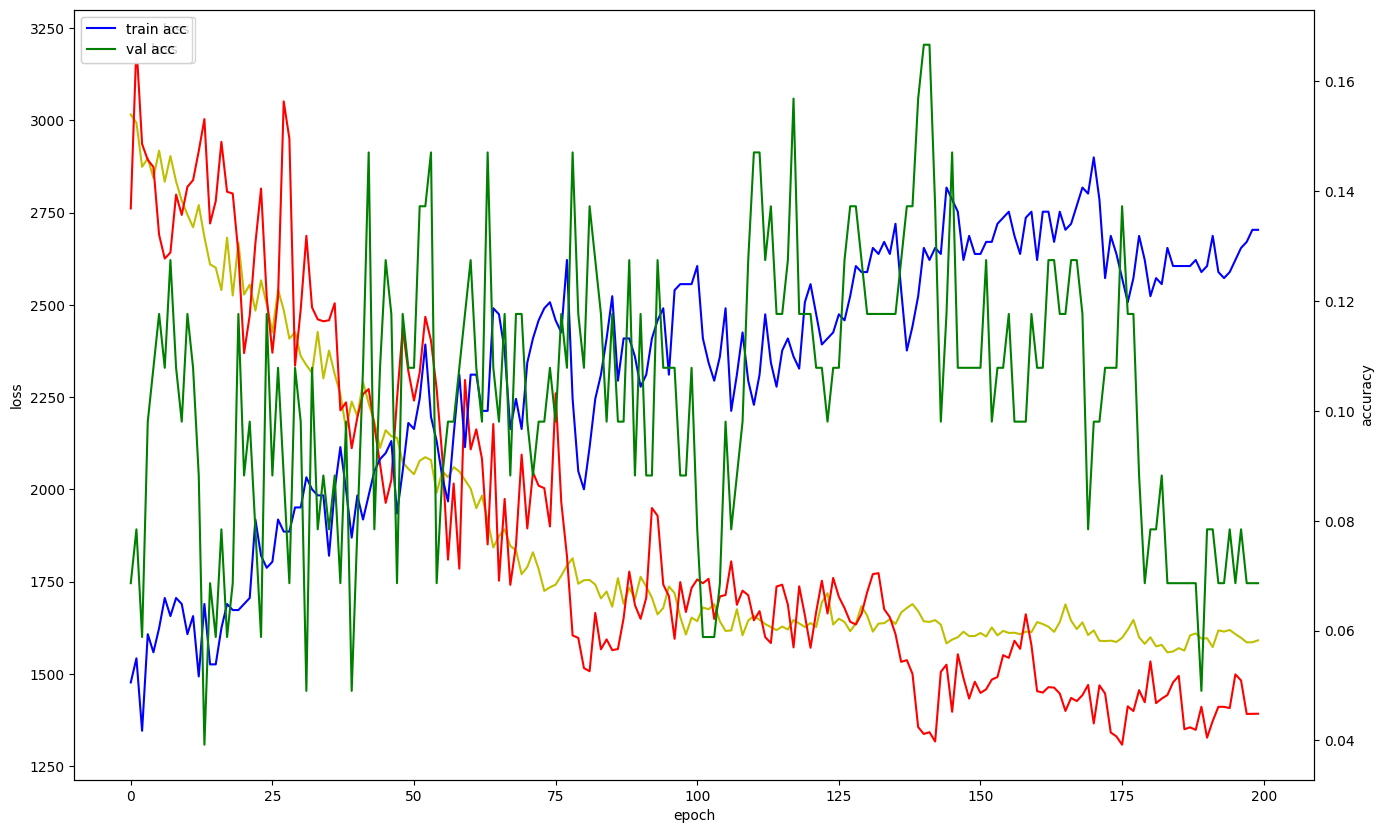

In [28]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [15]:
# model.save('210820_test1.h5')

In [17]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('./models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[101,   1],
        [  0,   0]],

       [[ 76,  14],
        [  9,   3]],

       [[ 93,   0],
        [  9,   0]],

       [[ 96,   6],
        [  0,   0]],

       [[100,   2],
        [  0,   0]],

       [[ 77,  11],
        [ 11,   3]],

       [[ 72,  11],
        [ 14,   5]],

       [[ 73,  18],
        [  9,   2]],

       [[ 64,   5],
        [ 29,   4]],

       [[ 95,   7],
        [  0,   0]],

       [[100,   2],
        [  0,   0]],

       [[101,   1],
        [  0,   0]],

       [[ 92,   6],
        [  4,   0]],

       [[101,   1],
        [  0,   0]]], dtype=int64)

In [18]:
y_pred

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y_val

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
file_dir1 = 'C:/Users/BVer/are_you_ok/preprocessing'

In [31]:
raw_data = np.load(file_dir1 + '/punching/' + 'raw_punching_pushing_k3.mp4.npy')

In [22]:
raw_data = np.load(file_dir1 + '/kicking/' + 'raw_kicking_kicking_k24.mp4.npy')

In [26]:
raw_data = np.load(file_dir1 + '/normal/' + 'raw_normal_normal1.mp4.npy')

In [9]:
raw_data = np.load(file_dir1 + '/1slap-R/' + 'raw_1_slaping_k2.mp4_0.npy')

In [35]:
raw_data = np.load(file_dir1 + '/1slap-R/' + 'raw_1_slaping_k3.mp4_0.npy')

In [36]:
raw_data.shape

(53, 67)

In [11]:
raw_data[0][0]

477.0

In [33]:
def pred_raw(test):
    test = test[:, :-1]
    seq_length = 30
    seq = []
    action_seq = []
    actions = ['1slap-L',
                 '1slap-R',
                 '2pushing-A',
                 '2pushing-L',
                 '2pushing-R',
                 '3punching-L',
                 '3puncning-R',
                 '4kicking-L',
                 '4kicking-R',
                 '5tread-L',
                 '5tread-R',
                 '6footpushing-L',
                 '6footpushing-R',
                 'normal']
#     print(x_test_data[0][0])
    for raw_data in test:
        seq.append(raw_data)
        if len(seq) < seq_length:
            continue
        print(len(seq))
        input_data = np.expand_dims(np.array(seq[-seq_length:], dtype=np.float32), axis=0)
        y_pred = model.predict(input_data).squeeze()
        
        print(y_pred)

        i_pred = int(np.argmax(y_pred))
        conf = y_pred[i_pred]

        if conf < 0.5:
            continue

        action = actions[i_pred]
        action_seq.append(action)

        if len(action_seq) < 3:
            continue

        this_action = '?'
        if action_seq[-1] == action_seq[-2] == action_seq[-3]:
            this_action = action

        print(this_action)

In [31]:
def pred_raw_part(test):
    test = test[:, :-1]
    seq_length = 30
    seq = []
    action_seq = []
    actions = ['assult', 'normal']
    
    right_arm_seq = [] #2,3
    left_arm_seq = [] #4,5
    right_leg_seq = [] #7,8
    left_leg_seq = [] #10,11

    right_arm_action = 0
    left_arm_action = 0
    right_leg_action = 0      
    left_leg_action = 0

    nan_nan_skip_count = 10 #오차 허용 프레임
    
    right_arm_nan = 0
    left_arm_nan = 0
    right_leg_nan = 0      
    left_leg_nan = 0
        
    
#     print(x_test_data[0][0])
    for index, raw_data in enumerate(test):
        right_arm_nan = is_nan(raw_data[index][2], np.isnan(raw_data[index][3], right_arm_seq, right_arm_nan)
        left_arm_nan = is_nan(raw_data[index][4], np.isnan(raw_data[index][5], left_arm_seq, left_arm_nan)
        right_leg_nan = is_nan(raw_data[index][7], np.isnan(raw_data[index][8], right_leg_seq, right_leg_nan)
        left_leg_nan = is_nan(raw_data[index][10], np.isnan(raw_data[index][11], left_leg_seq, left_leg_nan)
        
        print(index, ' frame')
        pred_part(right_arm_seq, , right_arm_nan, right_arm_model, right_arm_action, 'right_arm')
        pred_part(left_arm_seq, left_arm_nan, left_arm_model, left_arm_action, 'left_arm')
        pred_part(right_leg_seq, right_leg_nan, right_leg_model, right_leg_action, 'right_leg')
        pred_part(left_leg_seq, left_leg_nan, left_leg_model, left_leg_action, 'left_leg')

SyntaxError: invalid syntax (<ipython-input-31-08c5f9a2ddb0>, line 29)

In [29]:
#         if not np.isnan(raw_data[index][2]) and not np.isnan(raw_data[index][3]):
#             right_arm_seq.append([raw_data[index][2], raw_data[index][3]])
#             right_arm_nan = 0
#         else:
#             right_arm_nan += 1
#             if right_arm_nan > nan_skip_count: #오차 허용 프레임
#                 right_arm_seq = []

def is_nan(key1, key2, part_seq, part_nan):
    if not np.isnan(key1) and not np.isnan(key2):
        part_seq.append([key1, key2])
        return 0
    else:
        part_nan += 1
        if part_nan > nan_skip_count: #오차 허용 프레임
            part_seq = []
            return 0
        else:
            return part_nan
        
def pred_part(part_seq, part_nan, part_model, part_action, part_name):
    seq_length = 30
    if len(part_seq) > seq_length and part_nan == 0:
        input_data = np.expand_dims(np.array(seq[-seq_length:], dtype=np.float32), axis=0)
        y_pred = part_model.predict(input_data).squeeze()

        print(part_name,' : ', y_pred)

        i_pred = int(np.argmax(y_pred))
        conf = y_pred[i_pred]

        if conf > 0.5 and actions[i_pred] == 'assult': #신뢰도
            part_action += 1
            if part_action > 3:
                print(part_name, '  detect  assult')
        else:
            part_action = 0
            

In [20]:
a = 0
hi(a)

In [19]:
def hi(b):
    b+=1

In [37]:
pred_raw(raw_data)

30
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
31
[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 6.885848e-26 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00]
32
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
?
33
[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 2.172967e-28 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
?
34
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
?
35
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
?
36
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
?
37
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.0216495e-17 1.0000000e+00 0.0000000e+00]
?
38
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
?
39
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
?
40
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
?
41
[0. 0. 0. 0. 0. 0. 0. 

In [111]:
def pred_(test):
    test_data = np.concatenate([test], axis=0)
    x_test_data = test_data[:, :, :-1]
    test_labels = test_data[:, 0, -1]

    print(x_test_data.shape)
    print(test_labels.shape)

    x_test_data = x_test_data.astype(np.float32)
    
    print(x_test_data[0])
#     print(x_test_data[0][0])
    for input_data in x_test_data:
        if len(seq) < seq_length:
            continue
        print(len(seq))
        input_data = np.expand_dims(np.array(seq[-seq_length:], dtype=np.float32), axis=0)

        y_pred = model.predict(input_data).squeeze()

        i_pred = int(np.argmax(y_pred))
        conf = y_pred[i_pred]
        print(conf)

        if conf < 0.9:
            continue

        action = actions[i_pred]
        action_seq.append(action)

        if len(action_seq) < 3:
            continue

        this_action = '?'
        if action_seq[-1] == action_seq[-2] == action_seq[-3]:
            this_action = action

        print(this_action)